<a href="https://colab.research.google.com/github/sumantsharma16/machine-learning/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
# loading the csv data to panda dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [5]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# checking missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation = gold_data.corr()

<ipython-input-8-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

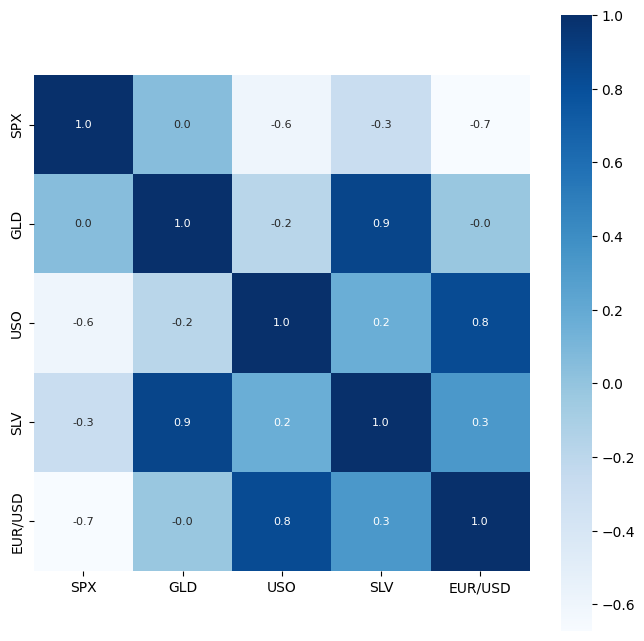

In [9]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt='.1f', annot = True, annot_kws={'size':8}, cmap='Blues')

In [10]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-12-5c1d7594d980>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

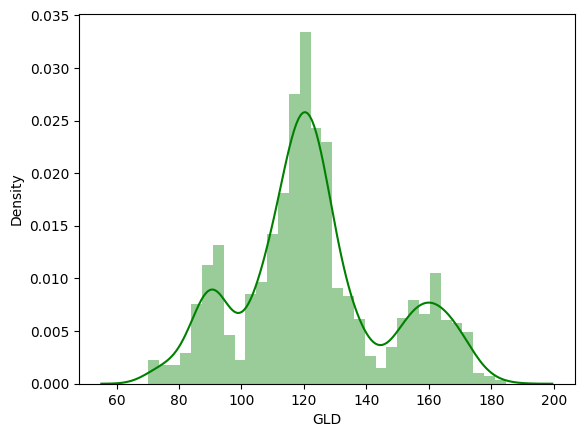

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color='green')

In [13]:
# splitting the features and target4
x  = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [14]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
# splitting into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

Model training RAndom forest regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model evaluation

In [19]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [20]:
print(test_data_prediction)

[167.54519874 144.48139822 159.94969691 108.25539848 142.62560014
 108.6159988  113.90189971 120.07570046  83.90239993 125.30709976
 115.50240126 108.93099868 154.83590207 114.90540044 118.36519981
 102.44539919 119.78140129 115.82700012 122.31599889 166.90600235
 104.62709932 152.17970139 108.55969973 120.18190004 118.96119943
 120.16109944  90.94570107 127.45089925 127.78000047 109.94439929
 121.82899993 121.91509332 121.07750039  71.12380076 108.48180017
  84.95199852 133.32899926 160.88659795 121.73929909 115.09800031
 139.97559659 167.58819858 116.04450085 121.01690155 154.32070278
 166.12459921 158.44770135 114.81970052 133.65160136  82.28160115
  92.5303003  118.89279836 126.68159817  92.14199907  71.95510098
 120.13660064  90.898201    92.43159941 120.29599892 147.36599723
 160.80409953 112.91399871  94.10430123 127.64039831 125.91300135
 118.53160038 126.19489917 127.44059971 123.0401995  106.8876992
 174.89080011 152.09740052 131.89179818 151.25310018 124.42620011
  91.115500

In [21]:
# R squared error
error_score  = metrics.r2_score(y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9872125038254465


compare the actual values and predicted values in a plot

In [22]:
y_test = list(y_test)

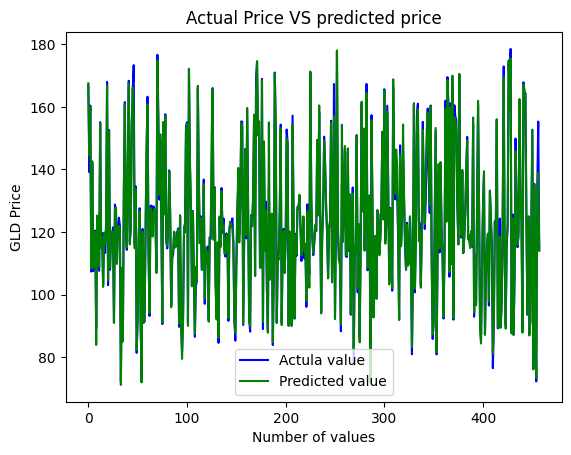

In [24]:
plt.plot(y_test, color='blue', label='Actula value')
plt.plot(test_data_prediction, color='green', label = 'Predicted value')
plt.title('Actual Price VS predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()